In [1]:
import os
os.sys.path
import sys
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import cv2
from PIL import Image
from imutils import paths
import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [2]:
data =r'.\Dog Emotion'
Img_Paths = list(paths.list_images(data))

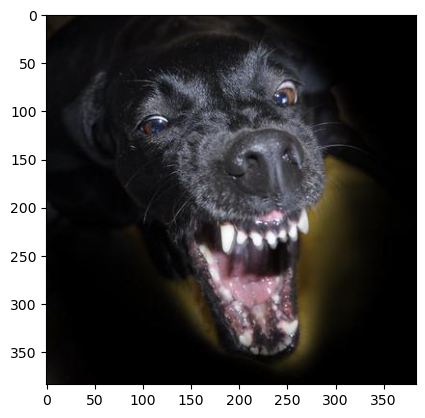

In [3]:
sample_img1 = Image.open(Img_Paths[200])
plt.imshow(sample_img1)

In [5]:
labels_df = pd.read_csv(r'.\Dog Emotion\labels.csv')
labels_df


,Unnamed: 0,filename,label
0,0,yubL63eiiPmoRru8Z2K2yRo0NnGDCL683.jpg,sad
1,1,c1tVljKiLM9q2zTBuQGWpxmzBuSeBR437.jpg,sad
2,2,RbzNOvY5GIAl3PSjIRTKpEkQs1NByq575.jpg,angry
3,3,gKujaBuWYezz0yWK9ydTFVi6LbQtXe397.jpg,angry
4,4,U0hJ2ryOu1IOuYpc01O7RngPYa8Xvz795.jpg,relaxed
...,...,...,...
3995,3995,3e7ne7hPR6zHzv8kjUkZ0DKoJNatJX22.jpg,angry
3996,3996,VxNty5XbeMojF1gpkRYG4yyBySQ4sC351.jpg,relaxed
3997,3997,i6WrJri63JSzctcnOJ8C94Nb5Gyugo629.jpg,sad
3998,3998,LMrUNwljuck3MxuzNaBbeAEMkofN7Q718.jpg,angry


In [6]:
class_names = labels_df['label'].unique()
class_names = class_names.tolist()

In [7]:
class_names

['sad', 'angry', 'relaxed', 'happy']

In [8]:
images = []
labels = []
img_size = (192, 192, 3)

for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(data + '\\' + image[2] + '\\' + image[1], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
    
    # labels will be in the form of a vector: [0, 1, 0, 0] or [1, 0, 0, 0]
    label = np.zeros(len(class_names))
    label[class_names.index(image[2])] = 1
    labels.append(label)

In [9]:
labels = np.asarray(labels)
images = np.asarray(images)

In [10]:
images.shape

(4000, 192, 192, 3)

In [11]:
print("max value of the pixel:",images.max())
print("min value for the pixel:", images.min())

max value of the pixel: 255
min value for the pixel: 0


In [12]:
labels.shape

(4000, 4)

In [13]:
labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

### Pre-Processing

In [13]:
# Scale pixel value into 0-1
images = images/255

In [24]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, 
                                                  test_size=0.2, 
                                                  stratify=labels,
                                                  random_state=42)

In [25]:
y_train.shape

(3200, 4)

In [26]:
X_train.shape

(3200, 192, 192, 3)

## Supervised 

In [27]:
# Define number of epochs
EPOCHS = 25

In [28]:
#Create CNN
model_cnn = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(img_size)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_cnn.optimizer.lr=0.001
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 192, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 96, 96, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 16)        9232      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 47, 47, 16)        0

In [29]:
history_cnn = model_cnn.fit(X_train, y_train, 
                            epochs=EPOCHS, 
                            #batch_size=BATCH_SIZE,
                            validation_data=(X_val, y_val))

Epoch 1/25
125/125 [==============================] - 175s 1s/step - loss: 11.8200 - accuracy: 0.2625 - val_loss: 1.3423 - val_accuracy: 0.3137
Epoch 2/25
125/125 [==============================] - 195s 2s/step - loss: 1.3418 - accuracy: 0.3015 - val_loss: 1.3117 - val_accuracy: 0.3500
Epoch 3/25
125/125 [==============================] - 193s 2s/step - loss: 1.3159 - accuracy: 0.3187 - val_loss: 1.2542 - val_accuracy: 0.3775
Epoch 4/25
125/125 [==============================] - 201s 2s/step - loss: 1.2929 - accuracy: 0.3410 - val_loss: 1.2439 - val_accuracy: 0.4062
Epoch 5/25
125/125 [==============================] - 210s 2s/step - loss: 1.2587 - accuracy: 0.3758 - val_loss: 1.2138 - val_accuracy: 0.4238
Epoch 6/25
125/125 [==============================] - 210s 2s/step - loss: 1.2442 - accuracy: 0.3798 - val_loss: 1.1621 - val_accuracy: 0.4675
Epoch 7/25
125/125 [==============================] - 195s 2s/step - loss: 1.1911 - accuracy: 0.4195 - val_loss: 1.1066 - val_accuracy: 0.502

In [42]:
model_cnn.save(f'./models/model_cnn{history_cnn.history["accuracy"][-1]}.hdf5')

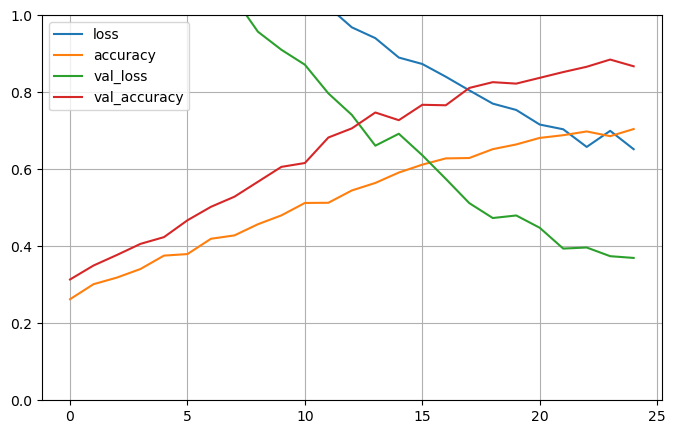

In [30]:
#Evaluate the model
pd.DataFrame(history_cnn.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [33]:
pred_cnn = model_cnn.predict(X_val)
pred_cnn = np.argmax(pred_cnn, axis=1)

25/25 [==============================] - 6s 254ms/step


In [34]:
i,true_cnn = np.where(y_val == 1)

In [35]:
print(classification_report(true_cnn, pred_cnn))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       200
           1       0.93      0.81      0.86       200
           2       0.96      0.84      0.90       200
           3       0.75      0.99      0.85       200

    accuracy                           0.87       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.88      0.87      0.87       800



[Text(0, 0.5, 'sad'),
 Text(0, 1.5, 'angry'),
 Text(0, 2.5, 'relaxed'),
 Text(0, 3.5, 'happy')]

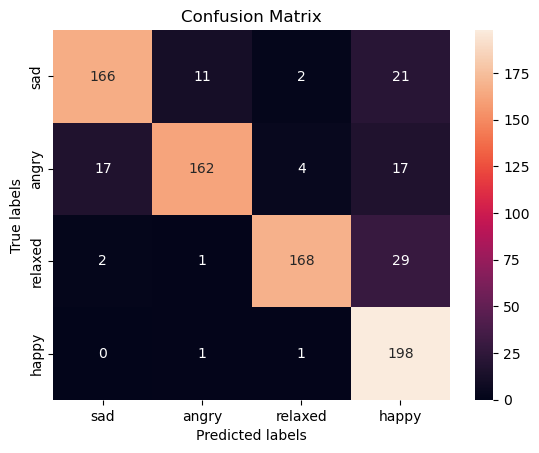

In [36]:
#Confusion Matrix
cnn_v1_cm=confusion_matrix(true_cnn, pred_cnn)
ax= plt.subplot()
sns.heatmap(cnn_v1_cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names)

### Unsupervised

In [36]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, LeakyReLU, Conv2D, Conv2DTranspose
from tensorflow.keras import layers, models

latent_dim = 100
img_size_gan = [32,32,3]

images_gan = []

for image in labels_df.iloc:
    images_gan.append(np.asarray(cv2.resize(cv2.imread(data + '\\' + image[2] + '\\' + image[1], cv2.IMREAD_COLOR), img_size_gan[0:2])[:, :, ::-1]))

train_dataset = tf.data.Dataset.from_tensor_slices((images_gan))
train_dataset = train_dataset.shuffle(buffer_size=3000).batch(256)

In [37]:
def make_generator_model():
    model = models.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    return model

In [38]:
def make_discriminator_model():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=img_size_gan))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [39]:
# Define the loss functions and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4, 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, 0.5)

In [40]:
generator = make_generator_model()
generator.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16384)             1638400   
                                                                 
 batch_normalization (BatchN  (None, 16384)            65536     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16384)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 128)       

In [41]:
discriminator = make_discriminator_model()
discriminator.compile ( loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        4864      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 dropout_16 (Dropout)        (None, 8, 8, 128)         0         
                                                                 
 flatten_5 (Flatten)         (None, 8192)             

In [42]:
# Define the GAN model

def make_gan_model(generator, discriminator):
    discriminator.trainable = False
    gan = models.Sequential([generator, discriminator])
    gan.compile(loss='binary_crossentropy', optimizer=generator_optimizer)
    return gan

gan = make_gan_model(generator, discriminator)

In [43]:
gan.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         2733504   
                                                                 
 sequential_6 (Sequential)   (None, 1)                 217985    
                                                                 
Total params: 2,951,489
Trainable params: 2,700,352
Non-trainable params: 251,137
_________________________________________________________________


1/1 [==============================] - 0s 154ms/step


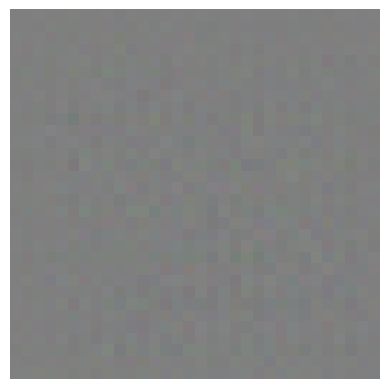

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array


# generate a sample from the GAN model
latent_dim = 100
random_latent_vectors = np.random.normal(size=(1, latent_dim))
generated_images = generator.predict(random_latent_vectors)

# plot the generated image
img = img_to_array(generated_images[0])
img = (img + 1) / 2.0  # rescale pixel values from [-1, 1] to [0, 1]
plt.imshow(img)
plt.axis('off')
plt.show()

In [45]:
## Create an input to represent noise sample from latent space
z = Input(shape=(latent_dim,))
## Pass noise through a generator to get an Image
img = generator(z)
discriminator.trainable = False
fake_pred = discriminator(img)

combined_model_gen = Model(z, fake_pred)  #first is noise and 2nd is fake prediction
combined_model_gen.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [46]:
combined_model_gen.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_5 (Sequential)   (None, 32, 32, 3)         2733504   
                                                                 
 sequential_6 (Sequential)   (None, 1)                 217985    
                                                                 
Total params: 2,951,489
Trainable params: 2,700,352
Non-trainable params: 251,137
_________________________________________________________________


In [47]:
def training_step(images):
    noise = tf.random.normal([256, 100])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        real_loss = cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = real_loss + fake_loss
        
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        
        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [48]:
#g Train the models in batches with 10 epochs
import time

num_epochs = 50

for epoch in range(num_epochs):
    start_time = time.time()
    
    for batch in train_dataset:
        training_step(batch)
        
    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1} took {epoch_time:.2f} seconds")


Epoch 1 took 54.52 seconds
Epoch 2 took 55.68 seconds
Epoch 3 took 55.00 seconds
Epoch 4 took 55.55 seconds
Epoch 5 took 55.30 seconds
Epoch 6 took 54.75 seconds
Epoch 7 took 55.25 seconds
Epoch 8 took 54.88 seconds
Epoch 9 took 54.82 seconds
Epoch 10 took 54.76 seconds
Epoch 11 took 54.83 seconds
Epoch 12 took 55.30 seconds
Epoch 13 took 54.73 seconds
Epoch 14 took 54.76 seconds
Epoch 15 took 54.66 seconds
Epoch 16 took 55.01 seconds
Epoch 17 took 55.50 seconds
Epoch 18 took 55.25 seconds
Epoch 19 took 54.70 seconds
Epoch 20 took 54.80 seconds
Epoch 21 took 54.81 seconds
Epoch 22 took 55.47 seconds
Epoch 23 took 55.33 seconds
Epoch 24 took 54.64 seconds
Epoch 25 took 54.64 seconds
Epoch 26 took 54.83 seconds
Epoch 27 took 55.34 seconds
Epoch 28 took 55.07 seconds
Epoch 29 took 54.73 seconds
Epoch 30 took 54.63 seconds
Epoch 31 took 55.35 seconds
Epoch 32 took 54.73 seconds
Epoch 33 took 54.97 seconds
Epoch 34 took 55.00 seconds
Epoch 35 took 54.77 seconds
Epoch 36 took 54.59 seconds
E

In [49]:
cur_time = time.time()
loc_cur_time = time.localtime(cur_time)[:]
loc_ctime_str = ".".join(map(str, loc_cur_time))
combined_model_gen.save(f'./models/model_cvgans{loc_ctime_str}.hdf5')

In [50]:
generated_images = (generated_images + 1) / 2

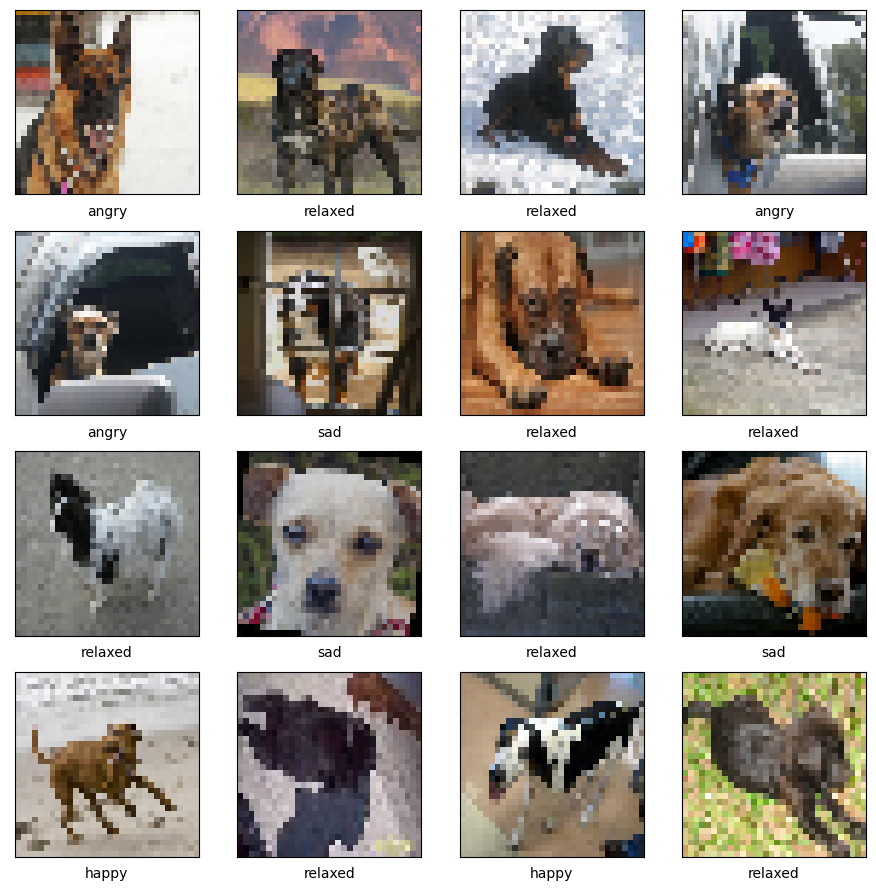

In [51]:
from random import randint
fig, axs = plt.subplots(4, 4, figsize=(11, 11))

for x in range(4):
    for y in range(4):
        i = randint(0, len(images_gan))
        
        axs[x][y].imshow(images_gan[i])
                
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
plt.show()

## Inception

In [39]:
from keras.applications.inception_v3 import InceptionV3

# Load pre-trained InceptionV3 model
base_inc = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size))

In [41]:
x = base_inc.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(4, activation='softmax')(x)
model_inc = Model(inputs=base_inc.input, outputs=predictions)


In [54]:
# Freeze the pre-trained layers in the base model
for layer in base_inc.layers:
    layer.trainable = False

In [55]:
# Compile the model with Adam optimizer and categorical cross-entropy loss function
model_inc.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history_inc = model_inc.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val,y_val)
)

Epoch 1/25
107/107 [==============================] - 180s 2s/step - loss: 1.7195 - accuracy: 0.4697 - val_loss: 1.0821 - val_accuracy: 0.5483
Epoch 2/25
107/107 [==============================] - 148s 1s/step - loss: 0.9615 - accuracy: 0.5938 - val_loss: 1.1430 - val_accuracy: 0.5333
Epoch 3/25
107/107 [==============================] - 150s 1s/step - loss: 0.8418 - accuracy: 0.6576 - val_loss: 0.9854 - val_accuracy: 0.5967
Epoch 4/25
107/107 [==============================] - 150s 1s/step - loss: 0.7197 - accuracy: 0.7100 - val_loss: 0.9860 - val_accuracy: 0.5950
Epoch 5/25
107/107 [==============================] - 150s 1s/step - loss: 0.6446 - accuracy: 0.7468 - val_loss: 0.9914 - val_accuracy: 0.6067
Epoch 6/25
107/107 [==============================] - 150s 1s/step - loss: 0.5075 - accuracy: 0.8062 - val_loss: 0.9560 - val_accuracy: 0.6400
Epoch 7/25
107/107 [==============================] - 150s 1s/step - loss: 0.4233 - accuracy: 0.8400 - val_loss: 0.9772 - val_accuracy: 0.6550

In [57]:
model_inc.save(f'./models/model_inc{history_inc.history["accuracy"][-1]}.hdf5')

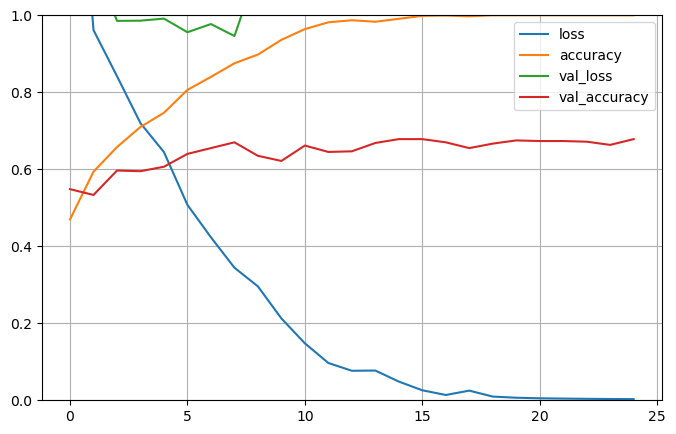

In [58]:
#Evaluate the model
pd.DataFrame(history_inc.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [59]:
pred_inc = model_inc.predict(X_val)
pred_inc = np.argmax(pred_inc, axis=1)

19/19 [==============================] - 24s 1s/step


In [60]:
i,true_inc = np.where(y_val == 1)

In [61]:
print(classification_report(true_inc, pred_inc))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       150
           1       0.72      0.70      0.71       150
           2       0.56      0.61      0.58       150
           3       0.66      0.66      0.66       150

    accuracy                           0.68       600
   macro avg       0.68      0.68      0.68       600
weighted avg       0.68      0.68      0.68       600



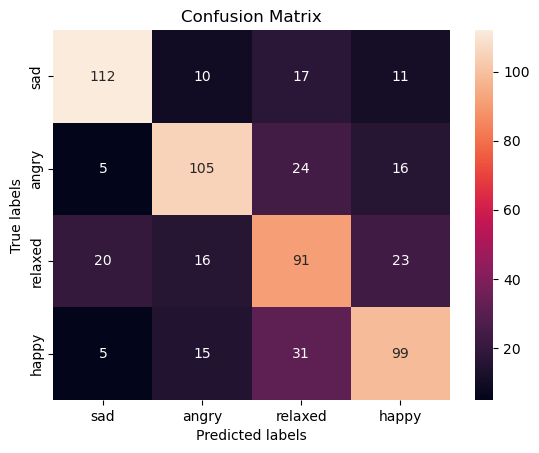

In [62]:
#Confusion Matrix
inc_cm=confusion_matrix(true_inc, pred_inc)
ax= plt.subplot()
sns.heatmap(inc_cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);

In [17]:
# Download Images from the internet
import urllib.request
angryURL = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSA40lVDQzgOlA9BA6E6uhopVx_BDnsOJZTow&usqp=CAU"
sadURL = "https://as2.ftcdn.net/v2/jpg/03/06/00/39/1000_F_306003982_zYRh6rlUoh7UVZvjWIUiEjOVP4Ugcb6R.jpg"
relaxURL = "https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/580540_mjznrj.jpg"
happyURL = "https://img-9gag-fun.9cache.com/photo/aqm128p_460s.jpg"

urllib.request.urlretrieve(angryURL, r".\angry.jpg")
urllib.request.urlretrieve(sadURL, r".\sad.jpg")
urllib.request.urlretrieve(relaxURL, r".\relax.jpg")
urllib.request.urlretrieve(happyURL, r".\happy.jpg")

('.\\happy.jpg', <http.client.HTTPMessage at 0x1f430af79a0>)

In [18]:
test_images = []
test_images.append(r".\sad.jpg")
test_images.append(r".\angry.jpg")
test_images.append(r".\relax.jpg")
test_images.append(r".\happy.jpg")

In [19]:
import PIL

pil_ver = PIL.__version__
if pil_ver == "9.0.1":
    lanc  = Image.LANCZOS
else:
    lanc = Image.Resampling.LANCZOS

In [22]:
from keras.models import load_model
model = load_model('.\models\model_cnn0.7045000195503235.hdf5')

1/1 [==============================] - 0s 65ms/step


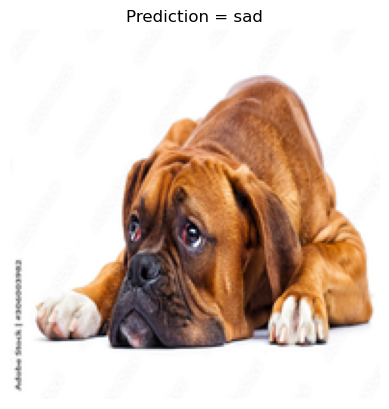

1/1 [==============================] - 0s 35ms/step


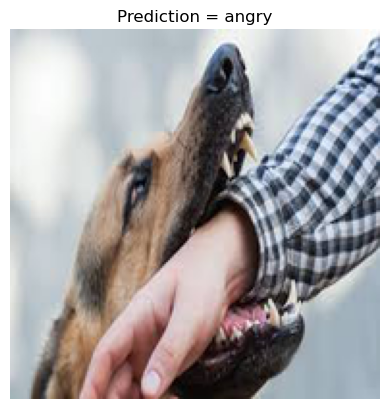

1/1 [==============================] - 0s 35ms/step


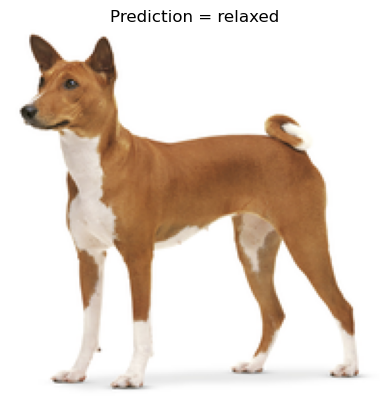

1/1 [==============================] - 0s 43ms/step


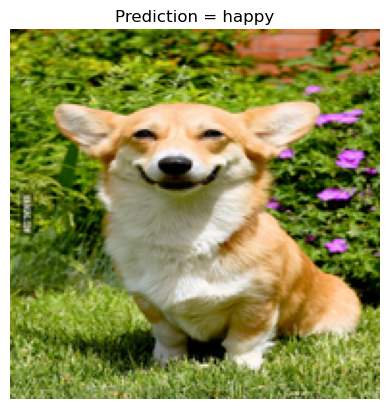

In [23]:
#predict using Supervised Model
i=0
for img in test_images:
    img = Image.open(test_images[i])
    img = img.resize((192, 192), lanc)
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    #img = img/255
    
    pred = model.predict(img)
    index = np.argmax(pred, axis=1)
    pred_value = class_names[index[0]]
    i += 1
    
    plt.imshow(img[0])                           
    plt.axis('off')
    plt.title('Prediction = {}'.format(pred_value))
    plt.show()